<a href="https://colab.research.google.com/github/ThisGuy245/AI-Tasks/blob/main/AI_Task_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Assignment, Task A1


# NPC's Power |	Enemy's Power	| Decision/Action

---

Strong (1)	|  Strong (1)	|  Attack (0)    >>   I should predict 0

---

Weak (0)	|  Strong (1)	 |  Flee (1)    >>   I should predict 1

---

Strong (1)	|  Weak (0)	|  Flee (1)    >>    I should predict 1

---

Weak (0)	|  Weak (0)	|  Attack (0)    >>    I should predict 0

---




Testing Activation Function: ReLU
  Testing Learning Rate: 0.1
    Predictions: [[0.]
 [1.]
 [1.]
 [0.]]
    Actual:      [[0.]
 [1.]
 [1.]
 [0.]]
  Testing Learning Rate: 0.01
    Predictions: [[1.]
 [1.]
 [0.]
 [0.]]
    Actual:      [[0.]
 [1.]
 [1.]
 [0.]]
  Testing Learning Rate: 0.001
    Predictions: [[0.]
 [1.]
 [1.]
 [1.]]
    Actual:      [[0.]
 [1.]
 [1.]
 [0.]]

Testing Activation Function: Sigmoid
  Testing Learning Rate: 0.1
    Predictions: [[0.]
 [1.]
 [1.]
 [0.]]
    Actual:      [[0.]
 [1.]
 [1.]
 [0.]]
  Testing Learning Rate: 0.01
    Predictions: [[1.]
 [1.]
 [0.]
 [0.]]
    Actual:      [[0.]
 [1.]
 [1.]
 [0.]]
  Testing Learning Rate: 0.001
    Predictions: [[1.]
 [0.]
 [0.]
 [0.]]
    Actual:      [[0.]
 [1.]
 [1.]
 [0.]]

Testing Activation Function: Tanh
  Testing Learning Rate: 0.1
    Predictions: [[0.]
 [1.]
 [1.]
 [0.]]
    Actual:      [[0.]
 [1.]
 [1.]
 [0.]]
  Testing Learning Rate: 0.01
    Predictions: [[0.]
 [0.]
 [1.]
 [0.]]
    Actual:      [[0.]


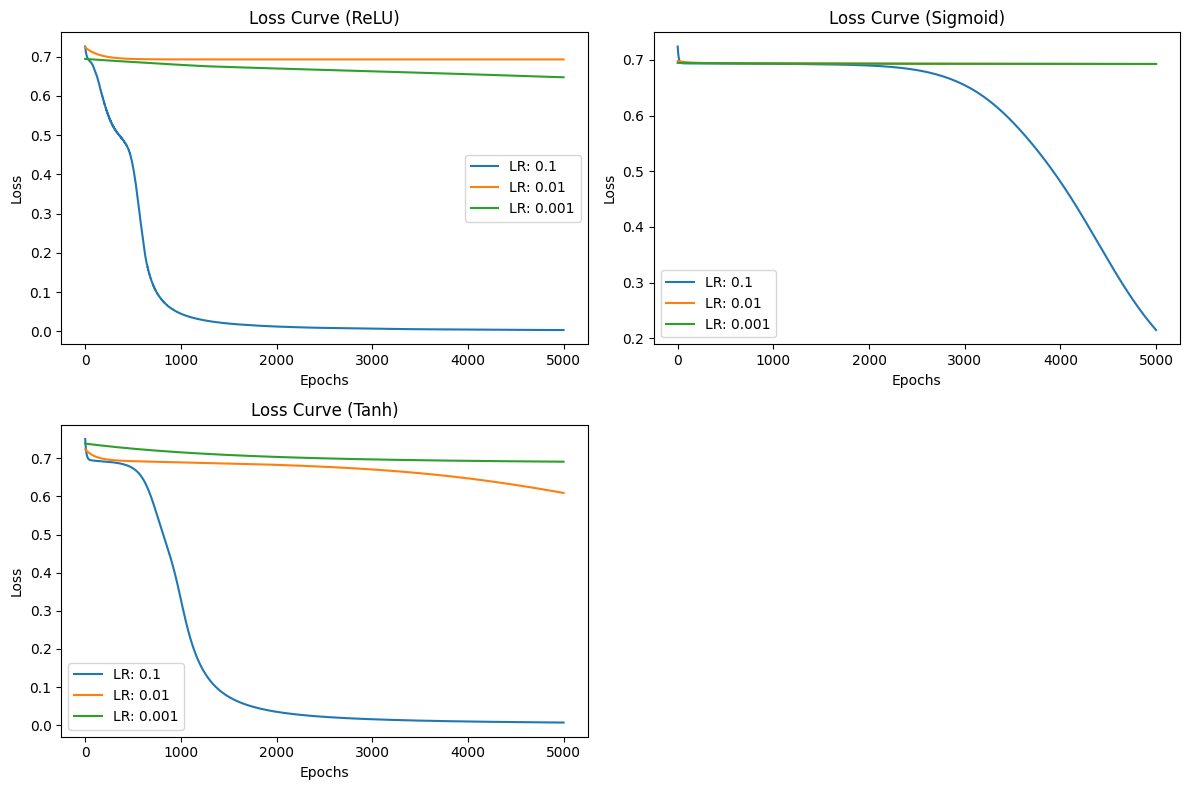

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt  # Import Matplotlib

# Input data: NPC power vs. Enemy power
x = np.array([[1, 1], [0, 1], [1, 0], [0, 0]], dtype=np.float32)

# Target data: Decision/Action (0 = attack, 1 = flee)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

# Convert NumPy arrays to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Neural Network Model
class NeuralNetwork(nn.Module):
    def __init__(self, activation=nn.ReLU):  # Default to ReLU
        super(NeuralNetwork, self).__init__()
        self.hidden = nn.Linear(2, 3)  # Input layer to hidden layer
        self.output = nn.Linear(3, 1)  # Hidden layer to output layer
        self.activation = activation()  # Activation function (modular)
        self.sigmoid = nn.Sigmoid()  # Sigmoid for binary classification

    def forward(self, x):
        x = self.activation(self.hidden(x))  # Apply selected activation function
        x = self.sigmoid(self.output(x))  # Apply Sigmoid to output layer
        return x

# Define learning rates to test
learning_rates = [0.2, 0.1, 0.05]

# Define activation functions to test
activations = [nn.ReLU, nn.Sigmoid, nn.Tanh]

# Prepare to plot
plt.figure(figsize=(12, 8))  # Create a larger plot
plot_idx = 1  # Track subplot index

# Loop through each activation function
for activation in activations:
    print(f"\nTesting Activation Function: {activation.__name__}")

    # Initialize subplot for this activation function
    plt.subplot(2, 2, plot_idx)  # Create a subplot (2 rows, 2 columns)

    for lr in learning_rates:
        print(f"  Testing Learning Rate: {lr}")

        # Initialize the model
        model = NeuralNetwork(activation=activation)
        optimizer = optim.SGD(model.parameters(), lr=lr)
        criterion = nn.BCELoss()  # Binary Cross-Entropy Loss

        # Tracking losses
        losses = []

        # Training loop
        epochs = 5000
        for epoch in range(epochs):
            outputs = model(x_tensor)
            loss = criterion(outputs, y_tensor)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Save loss for plotting
            losses.append(loss.item())

        # Plot the loss curve for this learning rate
        plt.plot(losses, label=f"LR: {lr}")

        # Validate the model after training
        with torch.no_grad():
            predictions = model(x_tensor)
            predictions = torch.round(predictions)
            print("    Predictions:", predictions.numpy())
            print("    Actual:     ", y_tensor.numpy())

    # Configure subplot
    plt.title(f"Loss Curve ({activation.__name__})")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Move to the next subplot
    plot_idx += 1

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
